# Tutorial 3 - Enzyme kinetics

In [24]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

## Question 1

In [26]:
a0_5 = pd.read_csv('A0.5B24.csv', sep=',', names=['Time', 'NADPH'])
a1 = pd.read_csv('A1B24.csv', sep=',', names=['Time', 'NADPH'])
a2= pd.read_csv('A2B24.csv', sep=',', names=['Time', 'NADPH'])
a4 = pd.read_csv('A4B24.csv', sep=',', names=['Time', 'NADPH'])
a8 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])

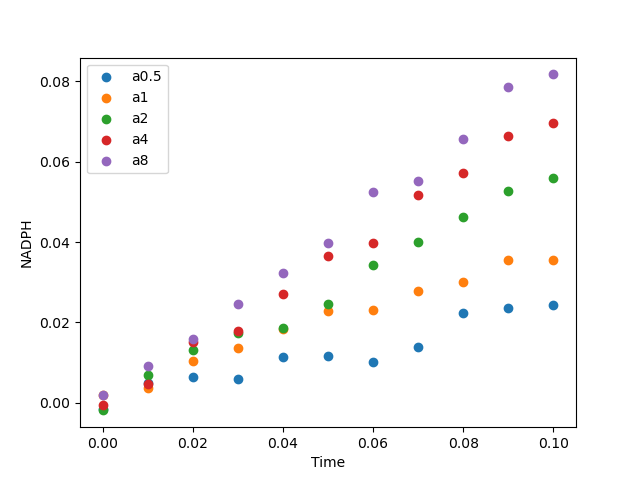

In [111]:
fig, ax = plt.subplots()
ax.scatter(a0_5.Time,a0_5.NADPH, label='a0.5')
ax.scatter(a1.Time,a1.NADPH, label='a1')
ax.scatter(a2.Time,a2.NADPH, label='a2')
ax.scatter(a4.Time,a4.NADPH, label='a4')
ax.scatter(a8.Time,a8.NADPH, label='a8')
ax.set_xlabel('Time')
ax.set_ylabel('NADPH')
ax.legend(loc='best')

In [31]:
b1_5 = pd.read_csv('A8B1.5.csv', sep=',', names=['Time', 'NADPH'])
b3 = pd.read_csv('A8B3.csv', sep=',', names=['Time', 'NADPH'])
b6= pd.read_csv('A8B6.csv', sep=',', names=['Time', 'NADPH'])
b12 = pd.read_csv('A8B12.csv', sep=',', names=['Time', 'NADPH'])
b24 = pd.read_csv('A8B24.csv', sep=',', names=['Time', 'NADPH'])

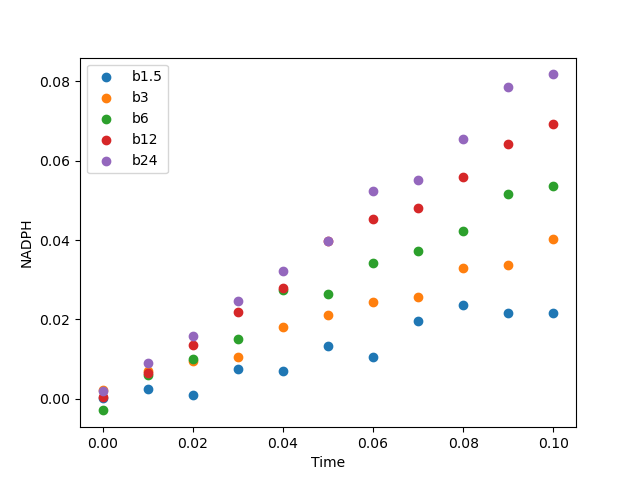

In [112]:
fig, ax = plt.subplots()
ax.scatter(b1_5.Time,b1_5.NADPH, label='b1.5')
ax.scatter(b3.Time,b3.NADPH, label='b3')
ax.scatter(b6.Time,b6.NADPH, label='b6')
ax.scatter(b12.Time,b12.NADPH, label='b12')
ax.scatter(b24.Time,b24.NADPH, label='b24')
ax.set_xlabel('Time')
ax.set_ylabel('NADPH')
ax.legend(loc='best')

### Question 2

In [33]:
reg0_5 = sp.stats.linregress(a0_5)
reg1 = sp.stats.linregress(a1)
reg2 = sp.stats.linregress(a2)
reg4 = sp.stats.linregress(a4)
reg8 = sp.stats.linregress(a8)
reg1_5 = sp.stats.linregress(b1_5)
reg3 = sp.stats.linregress(b3)
reg6 = sp.stats.linregress(b6)
reg12 = sp.stats.linregress(b12)
reg24 = sp.stats.linregress(b24)

In [23]:
reg4

LinregressResult(slope=0.30399171124831637, intercept=0.16597255395489796, rvalue=0.9937281718323947, pvalue=5.130722657465101e-96, stderr=0.0034380056904155486, intercept_stderr=0.19898896571557545)

In [126]:
# Linear regression of a
regressions = [reg0_5, reg1, reg2, reg4, reg8]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143


In [127]:
#linear regression of b
regressions = [reg1_5, reg3, reg6, reg12, reg24]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates1 = np.array(rates)

0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761
0.8250788434733143


In [43]:
rates

array([0.24118661, 0.35263044, 0.57465007, 0.73228566, 0.82507884])

### Question 3

In [52]:
concs = np.array([0.5, 1, 2, 4, 8])
const = np.array([24, 24, 24, 24, 24])
a_and_v = pd.DataFrame({'a': concs,'b':const, 'rate': rates})

In [53]:
a_and_v

a   b      rate
0  0.5  24  0.254221
1  1.0  24  0.367954
2  2.0  24  0.556409
3  4.0  24  0.701204
4  8.0  24  0.825079

In [60]:
concs2 = np.array([1.5, 3, 6, 12, 24])
consta=np.array([8, 8, 8, 8, 8])
b_and_v = pd.DataFrame({'a':consta,'b': concs2, 'rate': rates1})

In [61]:
b_and_v

a     b      rate
0  8   1.5  0.254221
1  8   3.0  0.367954
2  8   6.0  0.556409
3  8  12.0  0.701204
4  8  24.0  0.825079

In [62]:
df3 = pd.concat([a_and_v, b_and_v])

In [63]:
df3

a     b      rate
0  0.5  24.0  0.254221
1  1.0  24.0  0.367954
2  2.0  24.0  0.556409
3  4.0  24.0  0.701204
4  8.0  24.0  0.825079
0  8.0   1.5  0.254221
1  8.0   3.0  0.367954
2  8.0   6.0  0.556409
3  8.0  12.0  0.701204
4  8.0  24.0  0.825079

In [95]:
df3[:5]

a     b      rate
0  0.5  24.0  0.254221
1  1.0  24.0  0.367954
2  2.0  24.0  0.556409
3  4.0  24.0  0.701204
4  8.0  24.0  0.825079

In [98]:
df3[5:]

a     b      rate
0  8.0   1.5  0.254221
1  8.0   3.0  0.367954
2  8.0   6.0  0.556409
3  8.0  12.0  0.701204
4  8.0  24.0  0.825079

## Question 4

In [122]:
def v(a, b, Vf, Kb, Ka):
    return (Vf*a*b)/(Ka+a)+(Kb+b)

In [123]:
mymod = Model(v,  independent_vars=['a', 'b'])
mypar = mymod.make_params(Vf=1,Ka=1,Kb=1)
myfit = mymod.fit(df3.rate, mypar, a=df3.a,b=df3.b)
myfit

## Question 5

ValueError: operands could not be broadcast together with shapes (101,) (10,) 

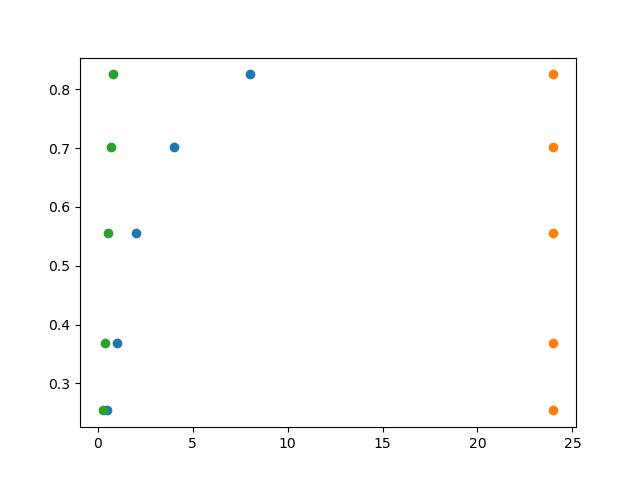

In [124]:
avals = np.linspace(0.01,8,101)
bvals=24
fig, ax = plt.subplots()
ax.plot(df3[:5], df3.rate[:5], 'o', label='data')
ax.plot(avals, myfit.eval(a=avals), label='fit')
ax.set_xlabel('[a] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')

ValueError: operands could not be broadcast together with shapes (10,) (101,) 

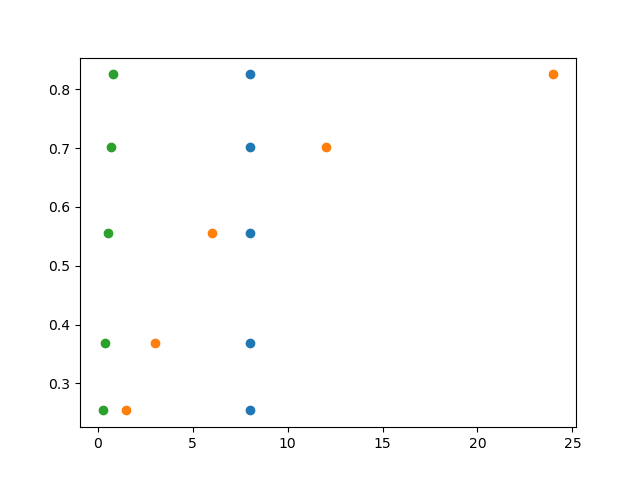

In [125]:
bvals = np.linspace(0.01,24,101)
avals = 8
fig, ax = plt.subplots()
ax.plot(df3[5:], df3.rate[5:], 'o', label='data')
ax.plot(avals, myfit.eval(b=bvals), label='fit')
ax.set_xlabel('[b] (mM)')
ax.set_ylabel('rate (mM/s)')
ax.legend(loc='best')